# CAP-421 - Exercícios - 2022-09-27

In [16]:
! wget https://github.com/tkorting/remote-sensing-images/raw/master/heliponto_1.tif

--2022-09-27 17:36:18--  https://github.com/tkorting/remote-sensing-images/raw/master/heliponto_1.tif
Resolvendo github.com (github.com)... 20.201.28.151
Conectando-se a github.com (github.com)|20.201.28.151|:443... conectado.
A requisição HTTP foi enviada, aguardando resposta... 302 Found
Localização: https://raw.githubusercontent.com/tkorting/remote-sensing-images/master/heliponto_1.tif [redirecionando]
--2022-09-27 17:36:18--  https://raw.githubusercontent.com/tkorting/remote-sensing-images/master/heliponto_1.tif
Resolvendo raw.githubusercontent.com (raw.githubusercontent.com)... 2606:50c0:8000::154, 2606:50c0:8003::154, 2606:50c0:8001::154, ...
Conectando-se a raw.githubusercontent.com (raw.githubusercontent.com)|2606:50c0:8000::154|:443... conectado.
A requisição HTTP foi enviada, aguardando resposta... 200 OK
Tamanho: 55373 (54K) [image/tiff]
Salvando em: “heliponto_1.tif”

heliponto_1.tif     100%[===================>]  54,08K  --.-KB/s    em 0,005s  

2022-09-27 17:36:18 (9,74 

In [86]:
import numpy as np
np.set_printoptions(precision=2, suppress=True, linewidth=100)
%precision %.2f

'%.2f'

In [2]:
import matplotlib.pyplot as plt 

In [3]:
import rasterio as rio

In [4]:
raster_filename = "heliponto_1.tif"

In [202]:
with rio.open(raster_filename) as rio_raster:
    rm = rio_raster.read(1)

In [203]:
rm.shape

(200, 267)

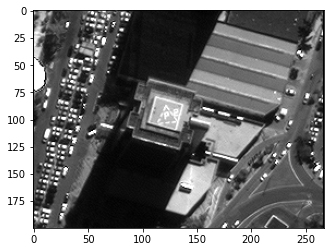

In [12]:
plt.imshow(rm, cmap='gray')

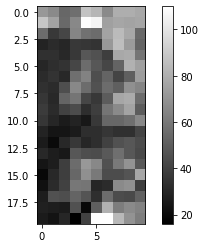

In [14]:
bm = rm[20:40, 15:25]
plt.imshow(bm, cmap='gray')
plt.colorbar()

# Exercicio 1

In [188]:
bm=im
nl=np.shape(bm)[0]
nc=np.shape(bm)[1]
k=15
f=1/k/k
y1=k//2
yn=nl-y1
x1=y1
xn=nc-x1
sm = np.zeros_like(bm)
for y in range(y1,yn):
    for x in range(x1,xn):
        sm[y,x] = (bm[y-y1:y+y1+1,x-x1:x+x1+1]*f).sum()

In [189]:
sm[6:16,6:16]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
       [  0, 115, 123, 122, 121, 118, 113, 107, 100,  93],
       [  0, 116, 124, 124, 122, 119, 114, 108, 100,  94],
       [  0, 117, 125, 125, 123, 119, 114, 107, 100,  94],
       [  0, 116, 123, 123, 120, 116, 111, 104,  97,  91],
       [  0, 114, 120, 119, 117, 112, 107, 100,  93,  87],
       [  0, 112, 118, 117, 114, 109, 103,  96,  89,  84],
       [  0, 114, 120, 117, 113, 107, 101,  93,  86,  81],
       [  0, 117, 123, 120, 115, 108, 101,  94,  86,  82],
       [  0, 121, 126, 122, 116, 109, 101,  94,  86,  82]], dtype=uint8)

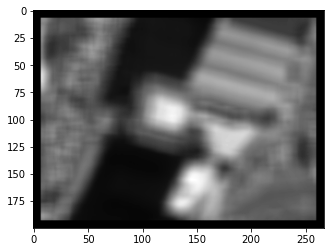

In [190]:
plt.imshow(sm, cmap = 'gray')

# Padding

In [173]:
nli=np.shape(im)[0]
nci=np.shape(im)[1]
k=15
bm=np.zeros([(nli+k),(nci+k)])
np.shape(bm)

(215, 282)

In [174]:
nl=np.shape(bm)[0]
nc=np.shape(bm)[1]
nl, nc

(215, 282)

In [179]:
f=1/k/k
y1=k//2
yn=nl-y1
x1=y1
xn=nc-x1
y1, yn, nl, nli

(7, 208, 215, 200)

In [180]:
bm[y1:nli+y1,x1:nci+x1]=im

In [182]:
sm = np.zeros_like(bm)
for y in range(y1,yn):
    for x in range(x1,xn):
        sm[y,x] = (bm[y-y1:y+y1+1,x-x1:x+x1+1]*f).sum()

In [183]:
cm=sm[y1:nli+y1,x1:nci+x1]

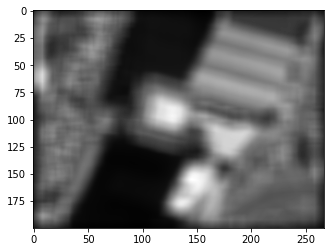

In [184]:
plt.imshow(cm, cmap = 'gray')

# Exercicio 2

Stride

In [185]:
stride=5
bm=im
nl=np.shape(bm)[0]
nc=np.shape(bm)[1]
k=15
f=1/k/k
y1=k//2
yn=nl-y1
x1=y1
xn=nc-x1
sm = np.zeros([nl//stride,nc//stride])
for y in range(y1,yn,stride):
    for x in range(x1,xn,stride):
        sm[y//stride,x//stride] = (bm[y-y1:y+y1+1,x-x1:x+x1+1]*f).sum()

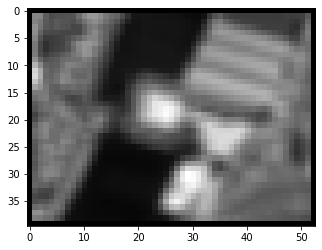

In [187]:
plt.imshow(sm, cmap = 'gray')

# Exercicio 3

Pesos

In [204]:
a=np.array([[-1, -1, -1, -1, -1],
            [ 2,  2,  2, -1, -1],
            [-1,  2,  2,  2, -1],
            [-1, -1, -1,  2,  2],
            [-1, -1, -1, -1, -1]])

In [216]:
bm=rm.copy()
nl=np.shape(bm)[0]
nc=np.shape(bm)[1]
k=5
f=1/k/k
y1=k//2
yn=nl-y1
x1=y1
xn=nc-x1
sm = np.zeros_like(bm).astype(int)
for y in range(y1,yn):
    for x in range(x1,xn):
        sm[y,x] = (bm[y-y1:y+y1+1,x-x1:x+x1+1]*a).sum()

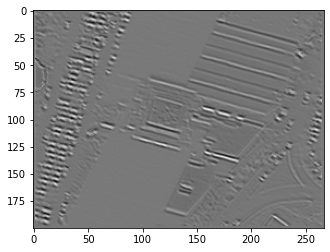

In [217]:
plt.imshow(sm, cmap = 'gray')

# Exercicio 4

Dilatação e erosão

Aplicar um kernel 3x3 preenchido com 1

In [218]:
a=np.array([[1, 1, 1],
            [1, 1, 1],
            [1, 1, 1]])

In [219]:
bm=rm.copy()
nl=np.shape(bm)[0]
nc=np.shape(bm)[1]
k=3
f=1/k/k
y1=k//2
yn=nl-y1
x1=y1
xn=nc-x1
sm = np.zeros_like(bm).astype(int)
for y in range(y1,yn):
    for x in range(x1,xn):
        sm[y,x] = (bm[y-y1:y+y1+1,x-x1:x+x1+1]+a).max()

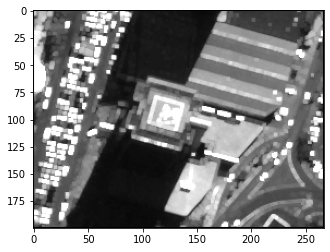

In [220]:
plt.imshow(sm, cmap = 'gray')

In [218]:
a=np.array([[1, 1, 1],
            [1, 1, 1],
            [1, 1, 1]])

In [221]:
bm=rm.copy()
nl=np.shape(bm)[0]
nc=np.shape(bm)[1]
k=3
f=1/k/k
y1=k//2
yn=nl-y1
x1=y1
xn=nc-x1
sm = np.zeros_like(bm).astype(int)
for y in range(y1,yn):
    for x in range(x1,xn):
        sm[y,x] = (bm[y-y1:y+y1+1,x-x1:x+x1+1]+a).min()

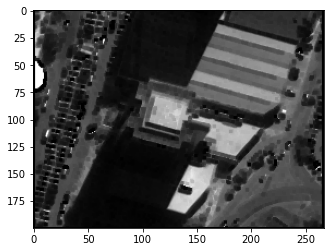

In [222]:
plt.imshow(sm, cmap = 'gray')